# FitBit Dataset

The dataset contains the amount of calories burnt based on various parameters. The dataset contains 15 parameters, out of which Calories is Dependent variable and rest are Independent variable. The dataset has 457 rows for each variable. The analysis of Calories with different variables are done.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('FitBit data.csv')

In [ ]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [ ]:
df.shape

(457, 15)

# Dataset description, data types and finding out any null values in the dataset

In [ ]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


The following things can be analysed by dataset description.
1. We see the the minimum calorie burnt is 0. Along this minimum column, we observe that expect SedentaryMinutes, all other variables /activities for burning calories are zero. 
2. The count of all variables are 457 which implies that there are no null values.

In [ ]:
df.isnull().any()

Id                          False
ActivityDate                False
TotalSteps                  False
TotalDistance               False
TrackerDistance             False
LoggedActivitiesDistance    False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
dtype: bool

We observe that the datset does not contain any null values.

In [ ]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

The data types for dataset is correct. However, we shall convert the activityDate to data-time format for more analysis with respect to calories burnt.

In [ ]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

In [ ]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


# Based on the ActiveMinutes, How are calories burnt?

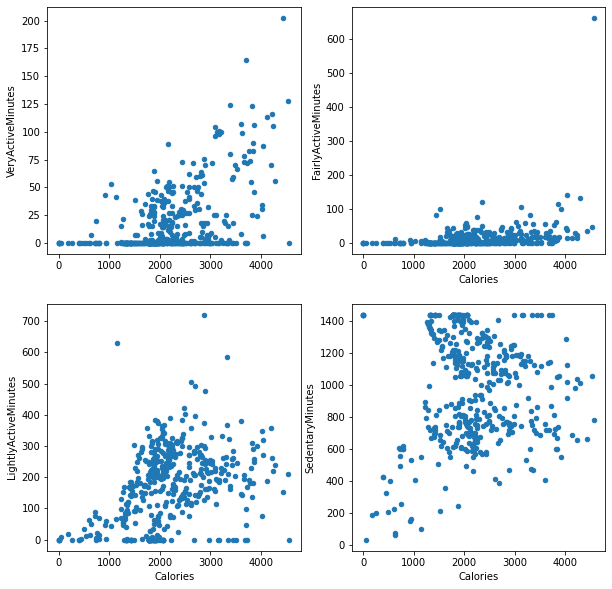

In [ ]:
fig1, ax1 = plt.subplots(2, 2, figsize = (10, 10))

df.plot.scatter('Calories', 'VeryActiveMinutes', ax = ax1[0][0])
df.plot.scatter('Calories', 'FairlyActiveMinutes', ax = ax1[0][1])
df.plot.scatter('Calories', 'LightlyActiveMinutes', ax = ax1[1][0])
df.plot.scatter('Calories', 'SedentaryMinutes', ax = ax1[1][1])
plt.show()

From scatter plot analysis, we can observe following things:

1. More concentration of FairlyActiveMinutes is present in its low values which means that, Calories are burnt more by only few amount of FairlyActiveMinutes.
2. For SedentaryMinutes, the datas are scattered more in the mid and upper region. Meaning, calories are burnt in the range of 2000-3000 by spending the concentrated amount in SedentaryMinutes.
3. Also for VeryActiveMinutes and LightlyActiveMinutes, the concentration are more in the mid-region.

# Based on the Distance covered, How are calories burnt?

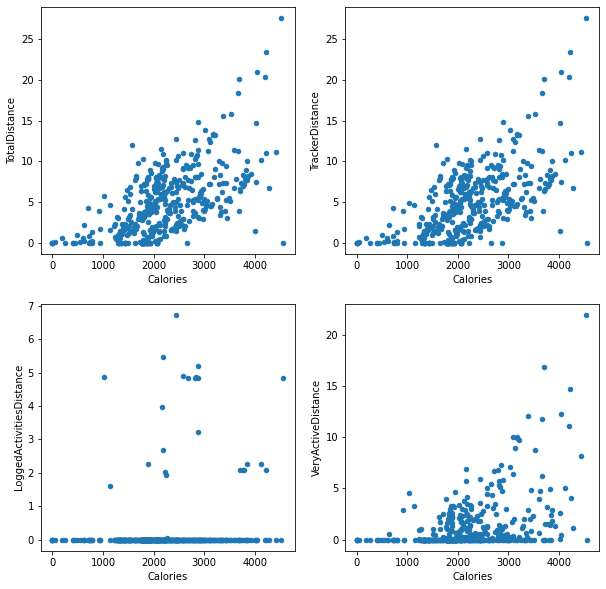

In [ ]:
fig1, ax1 = plt.subplots(2, 2, figsize = (10, 10))

df.plot.scatter('Calories', 'TotalDistance', ax = ax1[0][0])
df.plot.scatter('Calories', 'TrackerDistance', ax = ax1[0][1])
df.plot.scatter('Calories', 'LoggedActivitiesDistance', ax = ax1[1][0])
df.plot.scatter('Calories', 'VeryActiveDistance', ax = ax1[1][1])
plt.show()

From the scatter plot, we can observe that TotalDistance and Tracker Distance shows a similar distribution.

# Elimination of column

Since TotalDistance and TrackerDistance are same, there is no need of one of the column.


In [ ]:
df.drop(['TrackerDistance'], axis = 1, inplace = True)

# Maximum calories burnt

In [ ]:
#df[df['Calories'] == df['Calories'].max()]
max_calories = df.nlargest(5, ['Calories'])
max_calories.drop(['Id','SedentaryActiveDistance'], axis = 1, inplace = True)
max_calories
#SedentaryActiveDistance showed 0

,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
138,2016-04-01,0,0.000000,4.828032,0.00,0.00,0.00,0,660,0,780,4562
454,2016-04-10,28497,27.530001,0.000000,21.92,1.12,4.46,128,46,211,1055,4526
304,2016-04-02,14873,11.110000,0.000000,8.19,0.60,2.31,202,36,153,663,4430
347,2016-04-05,9348,6.700000,0.000000,1.13,2.04,3.14,56,133,240,1011,4286
416,2016-04-04,13935,11.050000,2.092147,4.09,0.79,6.17,105,16,220,658,4234


The max_calories dataframe gives the max 5 datas grouped by calories.
We can see that for a calorie burnt of 4526, total steps taken is 28497, total distance is 27.53, also veryActiveDistance is 21.92. This took place on 2016-04-10.

# Calories burnt based on ActivityDate

Splitting activitydate to year, day and month.

In [ ]:
df['day'] = df['ActivityDate'].dt.day
df['month'] = df['ActivityDate'].dt.month
df['year'] = df['ActivityDate'].dt.year

In [ ]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year
0,1503960366,2016-03-25,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,25,3,2016
1,1503960366,2016-03-26,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,26,3,2016
2,1503960366,2016-03-27,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,27,3,2016
3,1503960366,2016-03-28,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,28,3,2016
4,1503960366,2016-03-29,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,29,3,2016


In [ ]:
df.drop('ActivityDate', axis = 1, inplace=True)

The variable Id is not necessary. So, it can be removed.

In [ ]:
df.drop('Id', axis = 1, inplace = True)

In [ ]:
data2 = df[df['month']==3]
max_calories1 = data2.nlargest(5, ['Calories'])
max_calories1

,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year
181,2106,1.51,0.0,0.02,0.05,0.21,0.00,31,45,75,1289,4010,28,3,2016
169,12483,8.99,0.0,1.45,0.57,6.90,0.00,25,14,309,599,3830,16,3,2016
173,10330,7.41,0.0,0.00,0.00,0.00,0.00,0,0,0,1440,3728,20,3,2016
170,8940,6.41,0.0,0.00,0.00,0.61,0.04,0,0,47,986,3706,17,3,2016
178,5563,3.99,0.0,0.00,0.00,0.00,0.00,0,0,0,1440,3681,25,3,2016


From this filteration, we can observe that max calories value was 4010 on 28th day of 3rd month.

In [ ]:
data3 = df[df['month']==4]
max_calories2 = data3.nlargest(5, ['Calories'])
max_calories2

,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year
138,0,0.000000,4.828032,0.00,0.00,0.00,0.0,0,660,0,780,4562,1,4,2016
454,28497,27.530001,0.000000,21.92,1.12,4.46,0.0,128,46,211,1055,4526,10,4,2016
304,14873,11.110000,0.000000,8.19,0.60,2.31,0.0,202,36,153,663,4430,2,4,2016
347,9348,6.700000,0.000000,1.13,2.04,3.14,0.0,56,133,240,1011,4286,5,4,2016
416,13935,11.050000,2.092147,4.09,0.79,6.17,0.0,105,16,220,658,4234,4,4,2016


From this filteration, we can observe that max calories value was 4562 on 28th day of 4th month.


# Box plot

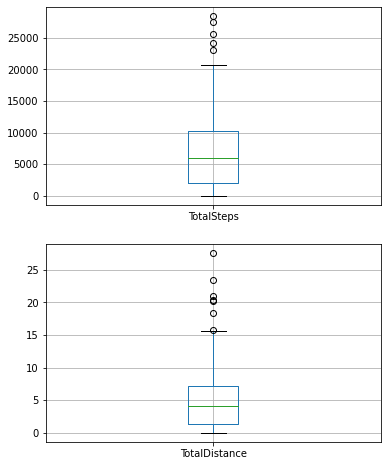

In [ ]:
fig, ax1 = plt.subplots(2, figsize = (6, 8))
df.boxplot('TotalSteps', ax = ax1[0])
df.boxplot('TotalDistance', ax = ax1[1])
plt.show()

The Boxpolot shows the presence of outliers in the dataFrame.

1. Presented here is the variable TotalSteps and TotalDistance.
2. We can observe that the median for TotalSteps is around 6000 and for TotalDistance is around 4. 
3. The max for TotalSteps is around 21000 and for TotalDistance is around 16.
4. There are outliers present in both the dataframes which are present outside the InterQuartile range.

# Correlation Matrix

In [ ]:
df.corr()

,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year
TotalSteps,1.000000,0.986789,0.146380,0.733689,0.541838,0.775562,0.081965,0.699699,0.238389,0.654418,-0.285258,0.581380,-0.122238,0.125961,NaN
TotalDistance,0.986789,1.000000,0.164312,0.791778,0.515128,0.744812,0.080787,0.714320,0.230712,0.614152,-0.260301,0.613647,-0.126215,0.127902,NaN
LoggedActivitiesDistance,0.146380,0.164312,1.000000,0.154754,0.060123,0.115671,0.091091,0.218253,0.231675,0.133856,-0.092991,0.148740,-0.084718,0.092581,NaN
VeryActiveDistance,0.733689,0.791778,0.154754,1.000000,0.240440,0.264580,0.044666,0.854292,0.129528,0.193593,-0.087726,0.434133,-0.117278,0.118005,NaN
ModeratelyActiveDistance,0.541838,0.515128,0.060123,0.240440,1.000000,0.326959,0.016350,0.272720,0.480906,0.291906,-0.236723,0.300781,-0.080761,0.096244,NaN
LightActiveDistance,0.775562,0.744812,0.115671,0.264580,0.326959,1.000000,0.069051,0.276649,0.112307,0.857555,-0.343560,0.451239,-0.145518,0.173448,NaN
SedentaryActiveDistance,0.081965,0.080787,0.091091,0.044666,0.016350,0.069051,1.000000,0.032322,-0.003361,0.110162,0.042280,0.096874,-0.015134,0.000613,NaN
VeryActiveMinutes,0.699699,0.714320,0.218253,0.854292,0.272720,0.276649,0.032322,1.000000,0.167764,0.199697,-0.177652,0.518905,-0.138809,0.142937,NaN
FairlyActiveMinutes,0.238389,0.230712,0.231675,0.129528,0.480906,0.112307,-0.003361,0.167764,1.000000,0.095449,-0.142598,0.334550,-0.092093,0.074754,NaN
LightlyActiveMinutes,0.654418,0.614152,0.133856,0.193593,0.291906,0.857555,0.110162,0.199697,0.095449,1.000000,-0.393499,0.377249,-0.187763,0.203407,NaN


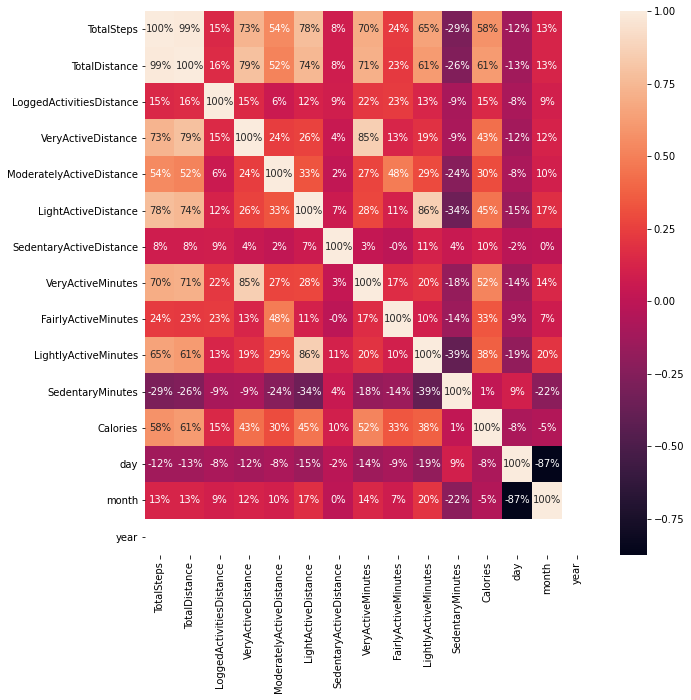

In [ ]:
# Co-relation matrix
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')
plt.show()

The Correlation matrix has a lot of positive relation which means that as one variable increases, the corresponding varaible increases by the respective percentage.

1. We can observe that Calories and TotalDistance have correlation of 
a percentage of 61% meaning as the TotalDistance is increased, Calories increases by 61% and so on.

2. There is a 86% correlation between LightActiveDistance and LightlyActiveMinutes.


# Conclusion

1. The dataset predicts the amount of calories burnt.
2. The activity date has been converted to day, month and year and analysed.
3. Analysis based on different variables affecting the calories burnt have been done.
4. Correlation matrix have been analysed.
5. This is a regression type of problem for ML.